# Traffic Tickets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.charts import BoxPlot
from bokeh.layouts import column,row
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [3]:
#Traffic Tickets
#data is from data.ny.gov
#https://data.ny.gov/Transportation/Traffic-Tickets-Issued-Four-Year-Window/q4hy-kbtf

url = "https://data.ny.gov/resource/85dq-q63a.json"
tt0 = pd.read_json(url)

#Download the publicly available dataset
tt= pd.read_csv('C:/Users/goode/Documents/Analytics/Traffic_Tickets_Issued__Four_Year_Window.csv')


## Data extraction 

In [4]:
#Preview of the dataset
tt.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,4024,IMPROPER PLATES,2014,6,FRIDAY,45.0,F,NEW YORK,SYRACUSE POLICE DEPT,SYRACUSE CITY COURT,TSLED
1,37510A,NO MIRROR/NO LEFTSIDE VIEW MIRROR,2014,11,TUESDAY,22.0,M,NEW YORK,SUFFOLK COUNTY POLICE DEPT,SUFFOLK DISTRICT COURT,TSLED
2,1140A,FLD TO YLD RT-OF-WAY AT INTERSECTION,2014,8,THURSDAY,63.0,F,UNKNOWN,FREEPORT VILLAGE POLICE DEPT,FREEPORT VILLAGE COURT,TSLED
3,1225C2A,OPERATING MV MOBILE PHONE,2013,6,TUESDAY,36.0,F,CONNECTICUT,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS NORTH TVB,TVB
4,1180D1A,SPEED IN ZONE 11-30,2014,5,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB


In [5]:
#Shape of the dataframe
print(tt.shape)

(14224866, 11)


In [6]:
#all the columns of the data frame
print(tt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14224866 entries, 0 to 14224865
Data columns (total 11 columns):
Violation Charged Code    object
Violation Description     object
Violation Year            int64
Violation Month           int64
Violation Day of Week     object
Age at Violation          float64
Gender                    object
State of License          object
Police Agency             object
Court                     object
Source                    object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ GB
None


In [7]:
vd = pd.DataFrame(tt['Violation Description'].unique())
vd

,0
0,IMPROPER PLATES
1,NO MIRROR/NO LEFTSIDE VIEW MIRROR
2,FLD TO YLD RT-OF-WAY AT INTERSECTION
3,OPERATING MV MOBILE PHONE
4,SPEED IN ZONE 11-30
5,INADEQUATE OR NO STOP LAMPS
6,AGGRAVATED UNLIC OPER 3RD MISD
7,DISOBEYED TRAFFIC DEVICE
8,INADEQUATE OR NO STOP LAMP OR LAMPS
9,FLD TO STOP AT STOP SIGN


## Question 
* Compare the number of daily/weekly or weekday/weekend traffic tickets
* Compare the number of traffic tickets by gender, month, age, state and type of violation
* Compare the number of type of violation by years

Using the visulaization tools to help answering the questions

## Data Cleaning

In [8]:
#Remove incomplete rows
tt1 = tt.dropna()
tt1.shape

(14092577, 11)

In [9]:
#Remove the duplicate data
tt2 = tt1.drop_duplicates()
tt2.shape

(12090696, 11)

In [10]:
#Looking for the abnormal data
tt2.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
Violation Year,12090696,2013,1,2012,2013,2014,2014,2015
Violation Month,12090696,6,3,1,3,6,9,12
Age at Violation,12090696,36,13,16,25,34,47,95


In [11]:
#tt2['Age at Violation'] = tt2['Age at Violation'].astype(pd.np.int64)

In [12]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090696 entries, 0 to 14224865
Data columns (total 11 columns):
Violation Charged Code    object
Violation Description     object
Violation Year            int64
Violation Month           int64
Violation Day of Week     object
Age at Violation          float64
Gender                    object
State of License          object
Police Agency             object
Court                     object
Source                    object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ GB


## Data Visualization

### matplotlib

In [13]:
#boxplot
speed30 = tt2.loc[tt2['Violation Description']=='SPEED IN ZONE 11-30',:]

speed = tt2.loc[tt2['Violation Description'].str.contains('SPEED'),:]


#plt.figure(figsize=(16, 8))
#plt.boxplot(['speed30','speed55'])


### Bokeh

### Seaborn

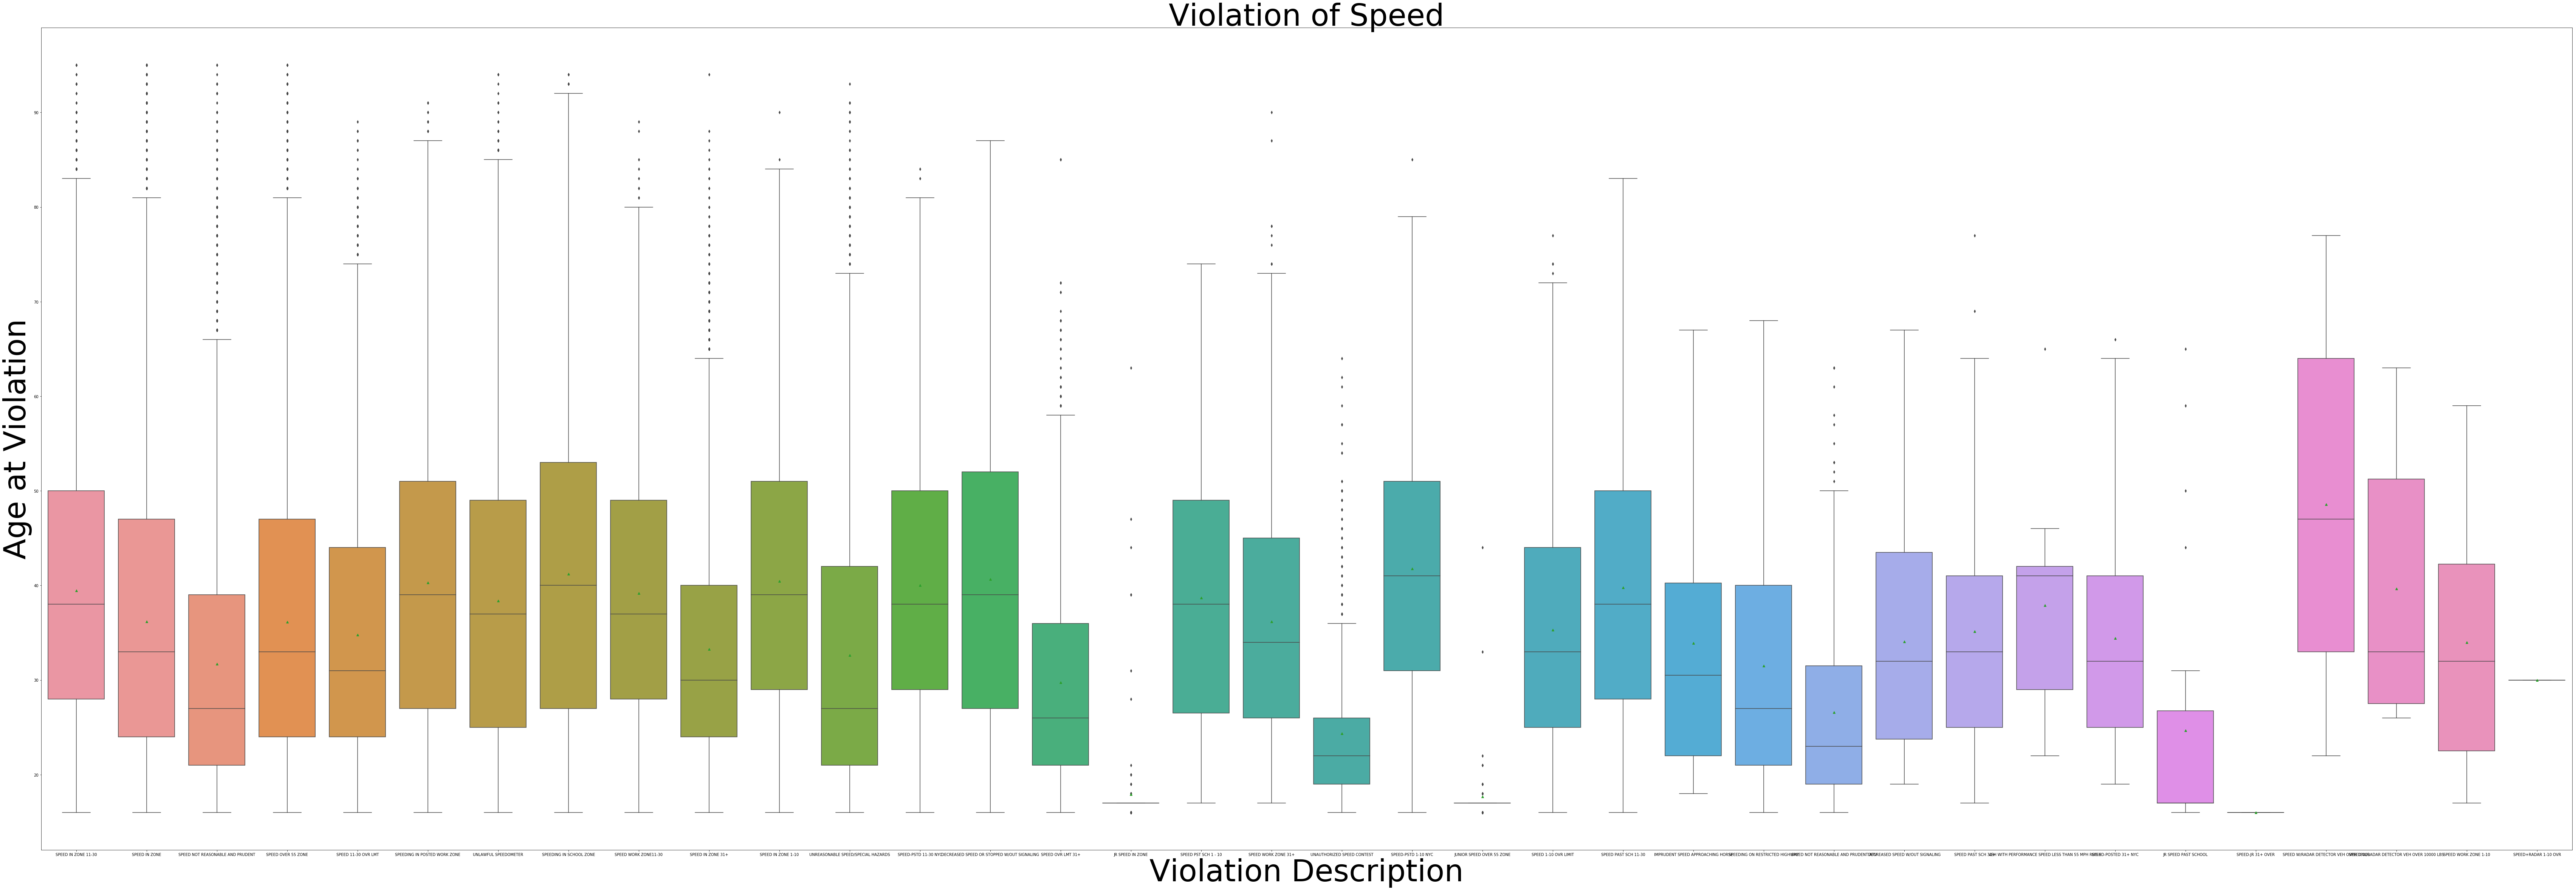

In [14]:
#Boxplot
plt.figure(figsize=(120,40))
plt.title('Violation of Speed',fontsize= 80)
sb = sns.boxplot(x= "Violation Description",y= "Age at Violation" ,data = speed, showmeans = True )
sb.set_xlabel("Violation Description",fontsize=80)
sb.set_ylabel("Age at Violation",fontsize=80)
plt.show(sb)

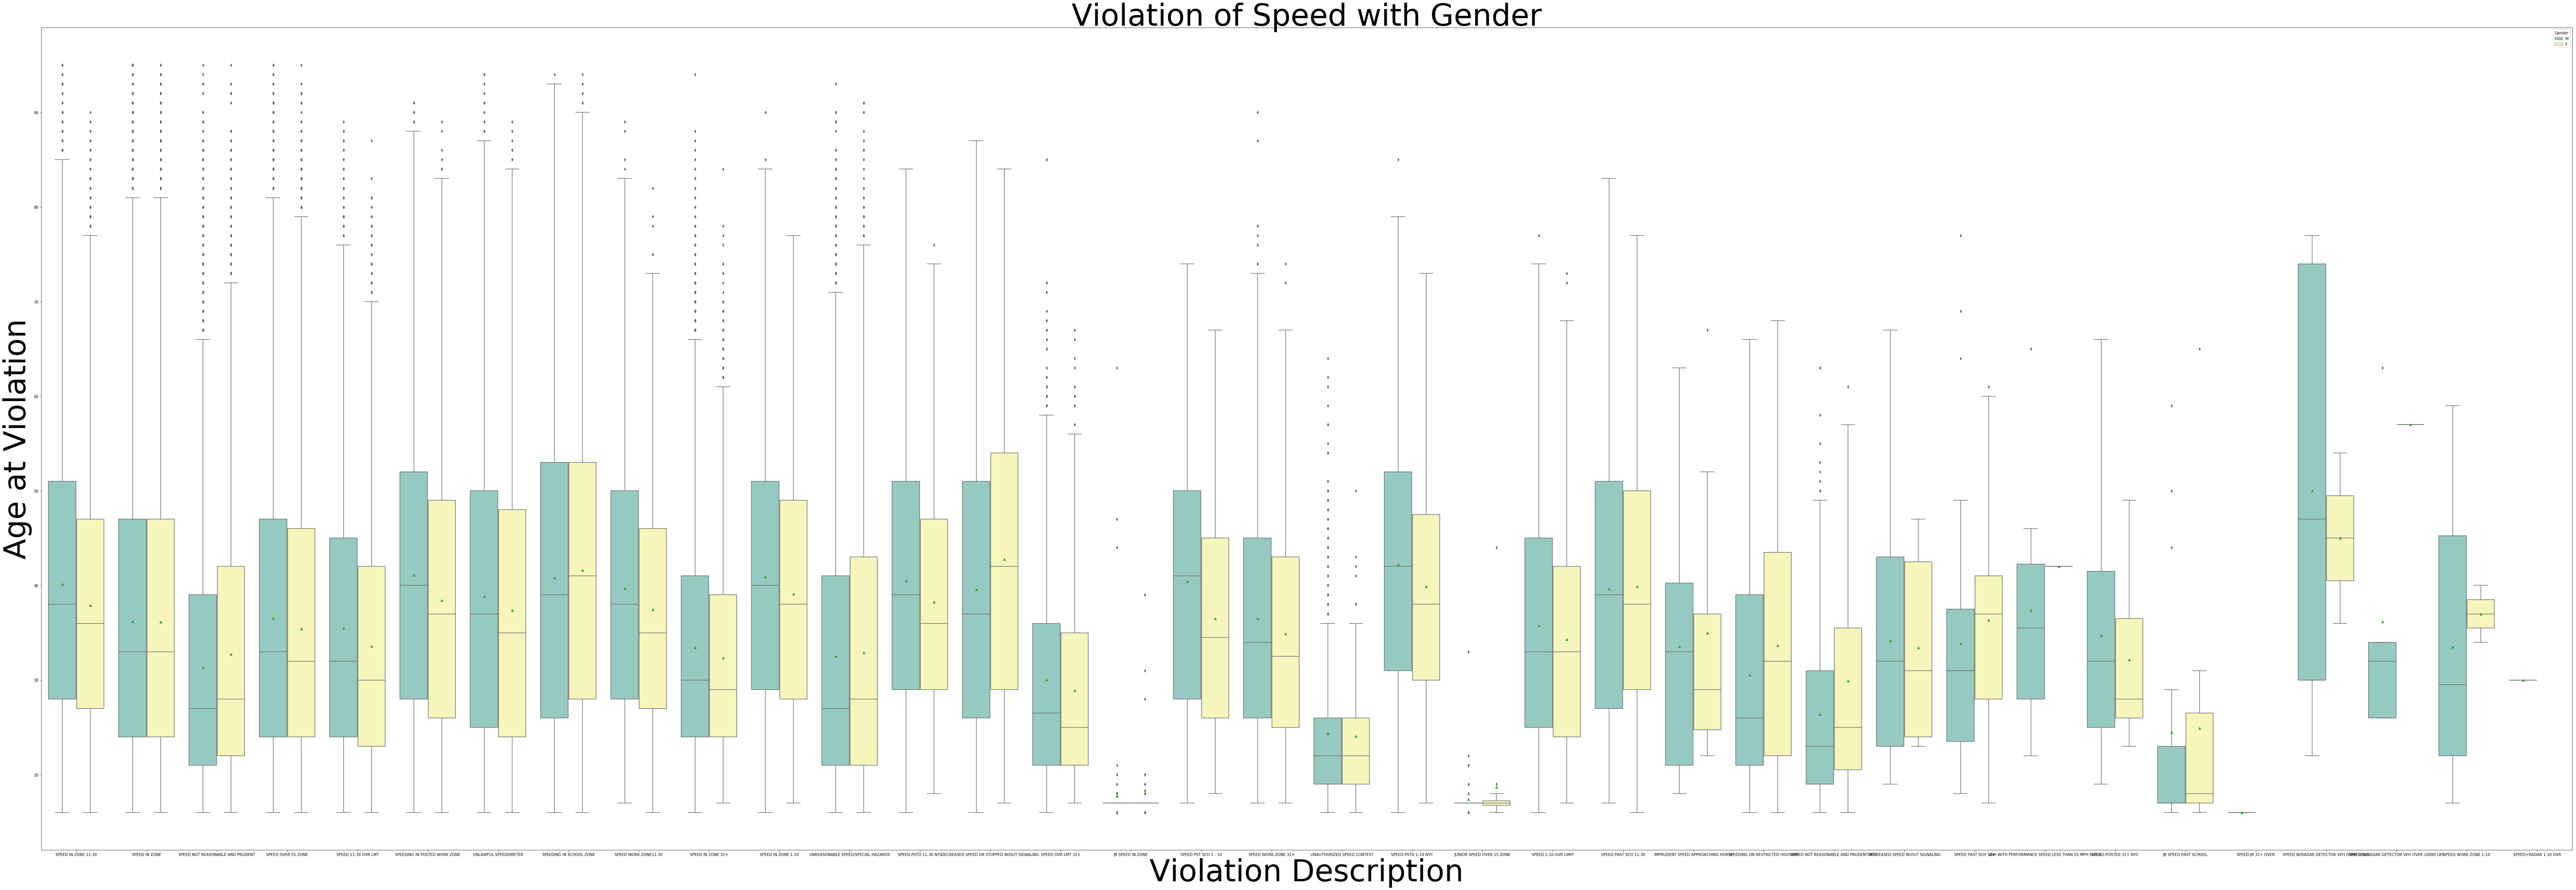

In [15]:
plt.figure(figsize=(120,40))
plt.title('Violation of Speed with Gender',fontsize= 80)
sbg = sns.boxplot(x= "Violation Description",y= "Age at Violation" ,hue = "Gender", palette="Set3", data = speed, showmeans = True )
sbg.set_xlabel("Violation Description",fontsize=80)
sbg.set_ylabel("Age at Violation",fontsize=80)
plt.show(sbg)

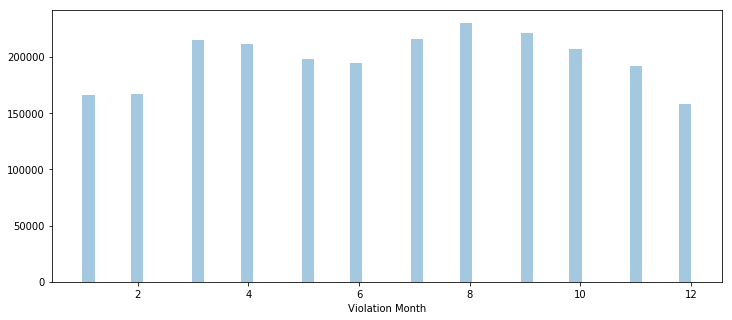

In [16]:
plt.figure(figsize=(12,5))
shis =sns.distplot(speed['Violation Month'],kde= False,)
plt.show(shis)

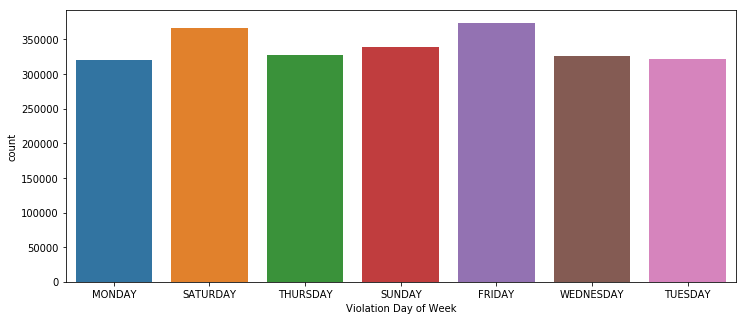

In [17]:
plt.figure(figsize=(12,5))
sbar =sns.countplot(x = 'Violation Day of Week',data= speed)
plt.show(sbar)